In [7]:
pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [9]:
pip install plotly


Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/17.3 MB ? eta -:--:--
   ------ --------------------------------- 2.6/17.3 MB 21.6 MB/s eta 0:00:01
   ---------------- ----------------------- 7.1/17.3 MB 20.8 MB/s eta 0:00:01
   ----------------------------------- ---- 15.5/17.3 MB 28.6 MB/s eta 0:00:01
   ---------------------------------------- 17.3/17.3 MB 28.0 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import mysql.connector as cnt
# IMPORTUOTI DARBO PRADZIOJE
# nuosavų funkcijų importavimas:
from manoFunkcijos import *

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import sqlite3
import mysql.connector as cnt
import plotly.express as px


In [11]:
from manoFunkcijos import *

In [3]:
#prisijungimas prie mySQL, ir kursoriaus sukūrimas
DB = cnt.connect(
    host = '88.223.121.130',
    user='user',
    password='slaptazodis',
    port=3306,
    database='works'
    )
C=DB.cursor()
# IMPORTUOTI DARBO PRADZIOJE

In [4]:
#sql užklausos vykdymas per mysql/mariadb kursorių
sql="""
select lytis, count(*),
avg(bdu_spalio)
from DUS2014N
group by lytis;
"""
C.execute(sql)
ans = C.fetchall()
lytis, kiekis, atlyginimas = list(map(list, zip(*ans)))
#? = np.transpose(ans)

In [8]:
pout(ans)   #workbench imitacija 

Rodoma 5 eilutės iš 6
| 0 |    Samsung     |     36290      |    30.4927     |
| 1 |     Nokia      |     35186      |    29.5651     |
| 2 |   BlackBerry   |      7161      |     6.0170     |
| 3 |       LG       |      5194      |     4.3643     |
| 4 |  SonyEricsson  |      4090      |     3.4366     |


In [7]:
#sql užklausos vykdymas per mysql/mariadb kursorių
sql="""select *, C/(select count(*) from sa)*100 as '%' from
(select * from
(select device_brand as B, count(*) as C
from sa
where device_brand != ''
group by device_brand
order by C desc
limit 5) as T1
union all
select 'Others', count(*) as C
from sa
where device_brand not in
(select B from (select device_brand as B, count(*) as C
from sa
where device_brand != ''
group by device_brand
order by C desc
limit 5) as T2)) as T3;"""
C.execute(sql)
ans = C.fetchall()
gamintojai, kiekiai, dalis = list(map(list, zip(*ans)))
#? = np.transpose(ans)


In [22]:
pout(ans)

Rodoma 5 eilutės iš 6
| 0 |    Samsung     |     36290      |    30.4927     |
| 1 |     Nokia      |     35186      |    29.5651     |
| 2 |   BlackBerry   |      7161      |     6.0170     |
| 3 |       LG       |      5194      |     4.3643     |
| 4 |  SonyEricsson  |      4090      |     3.4366     |


In [9]:
# Raskite 5 top 2014 metais apmokamas specialybes, atvaizduokite jų vidutinį atlyginimą stulpeline diagrama (bar arba barh).
# Raskite 5 mažiausiai apmokamas specialybes 2014 metais, atvaizduokite jų vidutinį atlyginimą su bar arba barh.
# Raskite 5 vidutiniškai apmokamas specialybes (0.9-1.1 VDU, imate arčiausiai 1.1 VDU esančias), atvaizduojate vidutinius 
# atlyginimas su bar arba barh.
# Tada surandate šių 15-kos specialybių atlyginimų pokytį tarp 2014 ir 2018 metų, pokytį vizualizuokite su bar arba barh. 
# Kokios specialybėsm tas pokytis didžiausias?

sql="""
select lytis, count(*),
avg(bdu_spalio)
from DUS2014N
group by lytis;
"""
C.execute(sql)
ans = C.fetchall()
lytis, kiekis, atlyginimas = list(map(list, zip(*ans)))


In [10]:
pout(ans)

| 0 |       F        |     22366      |2097.37965841008|
| 1 |       M        |     22586      |2633.69374391215|


In [20]:
sql="""
SELECT 
    round(((kita_lentele.kitas - atlyginimai.atlyg)/atlyginimai.atlyg*100), 2) as Procentai, trecia_lentele.Profesija
FROM 
    (
        (SELECT profesija, AVG(bdu_spalio / 3.456) AS atlyg
        FROM DUS2014N
        GROUP BY profesija
        ORDER BY AVG(bdu_spalio / 3.456) DESC
        LIMIT 5)

        UNION ALL

        (SELECT profesija, AVG(bdu_spalio / 3.456) AS atlyg
        FROM DUS2014N
        GROUP BY profesija
        ORDER BY AVG(bdu_spalio / 3.456) ASC
        LIMIT 5)

        UNION ALL

        (SELECT profesija, AVG(bdu_spalio / 3.456) AS atlyg
        FROM DUS2014N
        GROUP BY profesija
        HAVING AVG(bdu_spalio / 3.456) BETWEEN 
            (SELECT AVG(bdu_spalio / 3.456) * 0.9 FROM DUS2014N) AND 
            (SELECT AVG(bdu_spalio / 3.456) * 1.1 FROM DUS2014N)
        ORDER BY AVG(bdu_spalio / 3.456)
        LIMIT 5)
    ) AS atlyginimai
JOIN 
    (
        SELECT profesija, AVG(bdu_spalio) AS kitas 
        FROM DUS2018N
        GROUP BY profesija
    ) AS kita_lentele
ON 
    atlyginimai.profesija = kita_lentele.profesija  
JOIN 
	(
		SELECT * from profesijos
	) AS trecia_lentele
ON atlyginimai.profesija = trecia_lentele.Kodas
ORDER BY Procentai DESC;
"""
C.execute(sql)
ans = C.fetchall()
Procentai, Profesija = list(map(list, zip(*ans)))

In [21]:
pout(ans)

Rodoma 5 eilutės iš 15
| 0 |     84.43      |Kirpėjai, kosmet|
| 1 |     60.96      |Medienos apdirbi|
| 2 |     58.88      |Laivų ir orlaivi|
| 3 |     50.33      |Kiti paslaugų as|
| 4 |     44.92      |Namų, viešbučių |


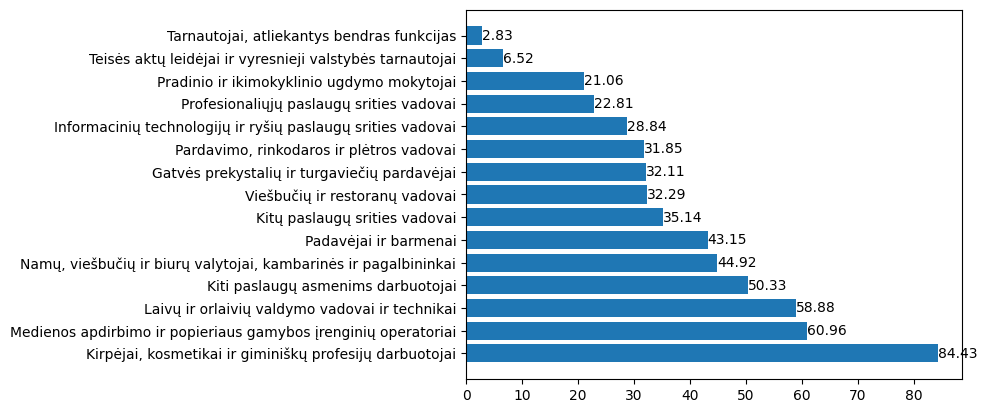

In [32]:
fig, axis = plt.subplots()
barai = axis.barh(Profesija, Procentai)
axis.bar_label(barai)
plt.show()

In [37]:
# -- Pateikite lentelę, kurioje būtų vidutinė kaina jūsų pasirinktam ploto intervalui
# -- pavyzdžiui, suskirstote butų plotus 5 kv m intervalais, ir suraskite vidutinę kainą tam intervalui.
# -- Ar kaina yra linkusi didėti, didėjant plotui?


sql="""
SELECT 
    CASE 
        WHEN Plotas >= 5 AND Plotas < 10 THEN '5-10'
        WHEN Plotas >= 10 AND Plotas < 20 THEN '10-20'
        WHEN Plotas >= 20 AND Plotas < 30 THEN '20-30'
        WHEN Plotas > 30 THEN 'daugiau 30'
        ELSE 'kita'
    END AS Plotas_ABC,
    AVG(`€/S`) AS Vidurkis
FROM aruodas
GROUP BY Plotas_ABC
ORDER BY 
    CASE
        WHEN Plotas_ABC = '5-10' THEN 1
        WHEN Plotas_ABC = '10-20' THEN 2
        WHEN Plotas_ABC = '20-30' THEN 3
        WHEN Plotas_ABC = 'daugiau 30' THEN 4
        ELSE 5
    END;
"""
C.execute(sql)
ans = C.fetchall()
Plotas_ABC, Vidurkis = list(map(list, zip(*ans)))

In [38]:
pout(ans)

| 0 |      5-10      |     751.0      |
| 1 |     10-20      |3094.82758620689|
| 2 |     20-30      |3150.59154929577|
| 3 |   daugiau 30   |3319.40261044176|
| 4 |      kita      |   3012.46875   |


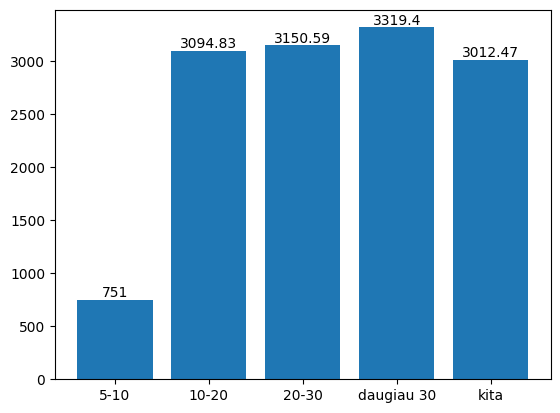

In [39]:
fig, axis = plt.subplots()
barai = axis.bar(Plotas_ABC, Vidurkis)
axis.bar_label(barai)
plt.show()

In [40]:
# -- Ar vidutinė kaina priklauso nuo kambarių skaičiaus?


sql="""
SELECT Kambariai, round(AVG(`€/S`)) from aruodas
group by Kambariai;
"""
C.execute(sql)
ans = C.fetchall()
Plotas_ABC, Vidurkis = list(map(list, zip(*ans)))

In [41]:
pout(ans)

Rodoma 5 eilutės iš 9
| 0 |       1        |     3074.0     |
| 1 |       2        |     3315.0     |
| 2 |       3        |     3288.0     |
| 3 |       4        |     3508.0     |
| 4 |       5        |     3590.0     |


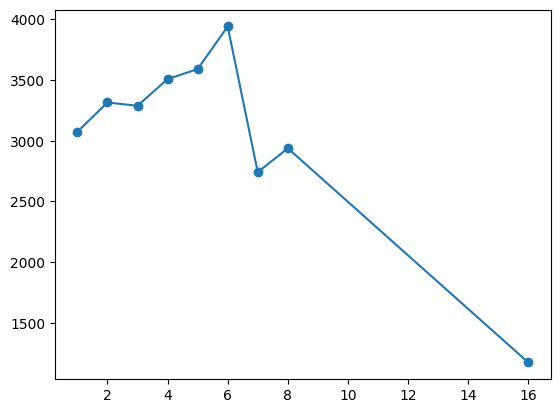

In [44]:
sql = """
SELECT Kambariai, round(AVG(`€/S`)) from aruodas
group by Kambariai;
"""
C.execute(sql)
ans = C.fetchall()
Kambariai, Vidurkis = list(map(list, zip(*ans)))

fig, axis = plt.subplots()

axis.plot(Kambariai, Vidurkis, marker='o')

# # Adding labels and title
# axis.set_xlabel('Kambarių Skaičius')
# axis.set_ylabel('Vidutinė Kaina €/S')
# axis.set_title('Vidutinė Kaina pagal Kambarių Skaičių')

# # Optional: Adding labels on data points
# for i in range(len(Kambariai)):
#     axis.text(Kambariai[i], Vidurkis[i], str(Vidurkis[i]), fontsize=12, verticalalignment='bottom')

plt.show()
